In [216]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [217]:
os.chdir('/content/drive/My Drive/Bootcamp ML2020/')
os.listdir('.')
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [219]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [220]:
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [221]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [222]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [224]:
# scaler = preprocessing.StandardScaler() 

# dataset.columns

# feature = dataset.drop(['Outcome'], axis=1) # Hapus kolom Outcome dari feature karena ini adalah variabel yang kita ingin diprediksi
# label = dataset['Outcome'] # Kolom Outcome digunakan karena ini adalah yang ingin kita prediksi

# feature_scaled = scaler.fit_transform(feature.values) # Features setelah discaling
# label_scaled = scaler.fit_transform(dataset['Outcome'].values.reshape(-1,1)).flatten() # Label/hasil prediksi setelah scaling

# feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2)

**EDA**

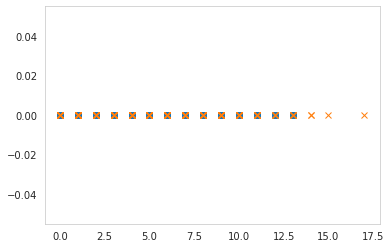

In [225]:
out_null = dataset.loc[dataset["Outcome"] == 0]
out_one = dataset.loc[dataset["Outcome"] == 1]

plt.plot(out_null["Pregnancies"],np.zeros_like(out_null["Age"]), 'o')
plt.plot(out_one["Pregnancies"],np.zeros_like(out_one["Age"]), 'x')
plt.grid()
plt.show()

In [226]:
# sb.set_style("whitegrid");
# sb.pairplot(dataset, hue="Outcome", size=3);
# plt.show()

In [227]:
Y = dataset['Outcome'] # Target prediksi
x = dataset.drop(['Outcome'], axis=1) # Data Id tidak diperlukan

In [228]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

In [229]:
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.2)

In [230]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)
np.bincount(y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([406, 406])

**Logistic Regression**

In [231]:
logreg = LogisticRegression(tol=0.25)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test))) # .score() -> Accuracy
print("f1 score         :",f1_score(y_test, y_pred, average='macro'))
print("precision score  :",precision_score(y_test, y_pred, average='macro'))
print("recall score     :",recall_score(y_test, y_pred, average='macro'))

Accuracy of logistic regression classifier on train set: 0.75
Accuracy of logistic regression classifier on test set: 0.79
f1 score         : 0.7861111111111112
precision score  : 0.7831737346101231
recall score     : 0.7936170212765958


In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        94
           1       0.71      0.80      0.75        60

    accuracy                           0.79       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.80      0.79      0.79       154



**Decision Tree Classifier**

In [233]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(x_train, y_train)
y_pred = dectree.predict(x_test)
print('Accuracy of Decision Tree Classifier on train set: {:.2f}'.format(dectree.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dectree.score(x_test, y_test))) # .score() -> Accuracy
print("f1 score         :",f1_score(y_test, y_pred, average='macro'))
print("precision score  :",precision_score(y_test, y_pred, average='macro'))
print("recall score     :",recall_score(y_test, y_pred, average='macro'))


Accuracy of Decision Tree Classifier on train set: 1.00
Accuracy of Decision Tree Classifier on test set: 0.71
f1 score         : 0.6957614942528736
precision score  : 0.6989795918367347
recall score     : 0.6936170212765957


In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        94
           1       0.64      0.60      0.62        60

    accuracy                           0.71       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.71      0.71      0.71       154



**SVM**


In [247]:
from sklearn.svm import SVC

def kernel_svc(ks):
  classifier_svc = SVC(kernel = ks, shrinking=True)
  classifier_svc.fit(x_train, y_train)
  y_pred = classifier_svc.predict(x_test)
  print('Accuracy of SVC ',ks,' classifier on test set: {:.2f}'.format(classifier_svc.score(x_train, y_train))) # .score() -> Accuracy
  print('Accuracy of SVC ',ks,' classifier on test set: {:.2f}'.format(classifier_svc.score(x_test, y_test)))
  print(f1_score(y_test, y_pred, average="macro"))
  print(precision_score(y_test, y_pred, average="macro"))
  print(recall_score(y_test, y_pred, average="macro"))

kernelsvc=['rbf','poly','linear']
for x in kernelsvc:
  print("SVC linear: ", x)
  kernel_svc(x)
  print()

SVC linear:  rbf
Accuracy of SVC  rbf  classifier on test set: 0.84
Accuracy of SVC  rbf  classifier on test set: 0.75
0.7387218862835515
0.7364041859667181
0.7443262411347518

SVC linear:  poly
Accuracy of SVC  poly  classifier on test set: 0.77
Accuracy of SVC  poly  classifier on test set: 0.75
0.7353951890034365
0.7418518518518519
0.7315602836879432

SVC linear:  linear
Accuracy of SVC  linear  classifier on test set: 0.74
Accuracy of SVC  linear  classifier on test set: 0.79
0.7851037851037851
0.7821969696969697
0.7906028368794327



In [236]:
classifier_linear_svc = SVC()
classifier_linear_svc.fit(x_train, y_train)
y_pred = classifier_linear_svc.predict(x_test)
print('Accuracy of LinearSVC classifier on train set: {:.2f}'.format(classifier_linear_svc.score(x_train, y_train))) # .score() -> Accuracy
print('Accuracy of LinearSVC classifier on test set: {:.2f}'.format(classifier_linear_svc.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of LinearSVC classifier on train set: 0.84
Accuracy of LinearSVC classifier on test set: 0.75
0.7387218862835515
0.7364041859667181
0.7443262411347518


**Random Forest**

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, bootstrap=True, max_features = "sqrt")
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
print('Accuracy of Random Forest on train set: {:.2f}'.format(rf_model.score(x_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf_model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on train set: 1.00
Accuracy of Random Forest on test set: 0.79
0.7710295111511603
0.7767676767676768
0.7671985815602838


**K-Nearest Neighbors**

In [238]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

def k_near(knnr):
  # knear = KNeighborsClassifier(knnr)
  # knear.fit(x_train, y_train)
  # y_pred = knear.predict(x_test)
  # print('Accuracy of KNN on train set: {:.2f}'.format(knear.score(x_train, y_train)))
  # print('Accuracy of KNN on test set: {:.2f}'.format(knear.score(x_test, y_test)))
  # print(f1_score(y_test, y_pred, average="macro"))
  # print(precision_score(y_test, y_pred, average="macro"))
  # print(recall_score(y_test, y_pred, average="macro"))
  
  knn = KNeighborsClassifier(knnr)
  knn.fit(x_train, y_train)
  f1_score(knn.predict(x_train), y_train)
  cross_validation_score = cross_val_score(knn, x_train, y_train, cv=10)
  knn_score = f1_score(knn.predict(x_test), y_test) 
  return knn_score

# k=[1,3,5,7,9,11,13,15,99]
# for x in k:
#   print("K Nearest Neighbor: ", x)
#   k_near(x)
#   print()

k=[1,3,5,7,9,11,13,15,99]
for x in k:
  print("K Nearest Neighbor: ", x)
  print(k_near(x))
  print()

K Nearest Neighbor:  1
0.5471698113207547

K Nearest Neighbor:  3
0.6984126984126984

K Nearest Neighbor:  5
0.7343749999999999

K Nearest Neighbor:  7
0.7328244274809161

K Nearest Neighbor:  9
0.7205882352941178

K Nearest Neighbor:  11
0.7246376811594204

K Nearest Neighbor:  13
0.7338129496402879

K Nearest Neighbor:  15
0.7142857142857143

K Nearest Neighbor:  99
0.6911764705882353



**XGBoost**

In [239]:
xgb_model = xgb.XGBClassifier(objective="reg:linear", n_estimators=150, learning_rate=0.07, booster='gbtree')
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test.values)
print('Accuracy of XGBoost on train set: {:.2f}'.format(xgb_model.score(x_train, y_train)))
print('Accuracy of XGBoost on test set: {:.2f}'.format(xgb_model.score(np.array(x_test), y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

[07:43:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy of XGBoost on train set: 0.91
Accuracy of XGBoost on test set: 0.77
0.7571525118269881
0.7626262626262627
0.7535460992907801


**Gaussian Process Classifier**

In [240]:
from sklearn.gaussian_process import GaussianProcessClassifier


gaus_model = GaussianProcessClassifier()
gaus_model.fit(x_train, y_train)

y_pred = gaus_model.predict(x_test)
print('Accuracy of Gauss on train set: {:.2f}'.format(gaus_model.score(x_train, y_train)))
print('Accuracy of Gauss on test set: {:.2f}'.format(gaus_model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))


Accuracy of Gauss on train set: 0.90
Accuracy of Gauss on test set: 0.75
0.7387218862835515
0.7364041859667181
0.7443262411347518


**MLP Classifier**

In [241]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes=(3,), activation='logistic',
                       solver='adam', alpha=0.0001,learning_rate='constant', 
                      learning_rate_init=0.3)
MLP_model.fit(x_train, y_train)

y_pred = MLP_model.predict(x_test)
print('Accuracy of MLP on train set: {:.2f}'.format(MLP_model.score(x_train, y_train)))
print('Accuracy of MLP on test set: {:.2f}'.format(MLP_model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of MLP on train set: 0.78
Accuracy of MLP on test set: 0.77
0.7665757221428262
0.7641091219096334
0.774645390070922


**ADA Boost**

In [242]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_model.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)
print('Accuracy of ADA Boost on train set: {:.2f}'.format(ada_model.score(x_train, y_train)))
print('Accuracy of ADA Boost on test set: {:.2f}'.format(ada_model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of ADA Boost on train set: 0.86
Accuracy of ADA Boost on test set: 0.77
0.7617890131259115
0.7610611669310771
0.7625886524822695


Dari setiap algoritma yang digunakan untuk menentukan akurasi dengan komposisi 20 train dan 80 test, saya mendapatkan hasil bahwa algoritma yang paling tinggi tingkat akurasinya ada 3, diantaranya random forest, svc linear dan logistic regression dimana akurasi yang didapatkan sama sama 79%